# Gathering insights from Riots/Protests in India (2016-2022)

This collection contains over 100,000 recordings and spans the years 2016 to 2022. The information is provided by ACLED (The Armed Conflict Location & Event Data Project), non-governmental organization that collects and analyzes conflict data.

# Data Preparation

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [188]:
import csv
df = pd.read_csv("2016-2022.csv", index_col="data_id")
df.head()

,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
data_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8912977,356,IND107923,107923.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Singraur Caste Group (India); Rajput Caste Gro...,5,Rioters (India),Sonkar Caste Group (India); Dalit Caste Group ...,5,55,South Asia,India,Uttar Pradesh,Fatehpur,Khaga,Kishanpur,25.6422,81.0244,1,Amar Ujala,Subnational,"On 18 March 2022, members of two caste groups ...",0,1647961433,IND
8912990,356,IND107846,107846.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Labour Group (India),6,NaN,NaN,0,60,South Asia,India,Maharashtra,Mumbai City,Mumbai City,Mumbai - Azad Maidan,18.9388,72.8321,1,Asian News International,National,"On 18 March 2022, aircraft technicians, employ...",0,1647961433,IND
8913012,356,IND107941,107941.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),NaN,6,NaN,NaN,0,60,South Asia,India,Punjab,Sangrur,Malerkotla,Ahmedgarh,30.6785,75.8272,1,Chandigarh Tribune,National,"On 18 March 2022, activists of various organis...",0,1647961433,IND
8913089,356,IND107842,107842.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Health Workers (India),6,NaN,NaN,0,60,South Asia,India,Madhya Pradesh,Indore,Indore,Indore,22.7179,75.8333,1,Free Press Journal (India),National,"On 18 March 2022, doctors staged a protest at ...",0,1647961433,IND
8913091,356,IND107850,107850.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Government of India (2014-),5,Civilians (India),Former Government of India (2014-),7,57,South Asia,India,Madhya Pradesh,Bhind,Bhind,Kanavar,26.5622,78.9797,1,Free Press Journal (India),National,"On 18 March 2022, around half a dozen persons,...",1,1647961433,IND


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107690 entries, 8912977 to 8543376
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iso               107690 non-null  int64  
 1   event_id_cnty     107690 non-null  object 
 2   event_id_no_cnty  107690 non-null  float64
 3   event_date        107690 non-null  object 
 4   year              107690 non-null  int64  
 5   time_precision    107690 non-null  int64  
 6   event_type        107690 non-null  object 
 7   sub_event_type    107690 non-null  object 
 8   actor1            107690 non-null  object 
 9   assoc_actor_1     76917 non-null   object 
 10  inter1            107690 non-null  int64  
 11  actor2            31375 non-null   object 
 12  assoc_actor_2     11511 non-null   object 
 13  inter2            107690 non-null  int64  
 14  interaction       107690 non-null  int64  
 15  region            107690 non-null  object 
 16  country      

In [190]:
print("Dataset size")
len(df)

Dataset size


107690

# Data Analysis


In [191]:
#Raluca
df['event_date'].unique()

array(['18 March 2022', '17 March 2022', '16 March 2022', ...,
       '03 January 2016', '02 January 2016', '01 January 2016'],
      dtype=object)

This graphic shows us the distribution of riots/protests over the years throughout India. It reaches an all time (2016-present) high in 2019 and reduces but doesn't reach the levels 2016 remaining a bit higher. The 2022 year is present and thus the lack of data makes it unconclusive, although it is certainly quite high since the last data is from March 2022 being about 25% of the year.

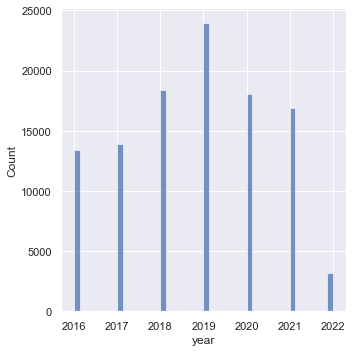

In [192]:
plt.rcParams['figure.figsize'] = [15, 10]
sns.displot(x=df.year, kde=False)

Protests                      79978
Riots                         15415
Battles                        5222
Violence against civilians     4397
Strategic developments         1391
Explosions/Remote violence     1287
Name: event_type, dtype: int64


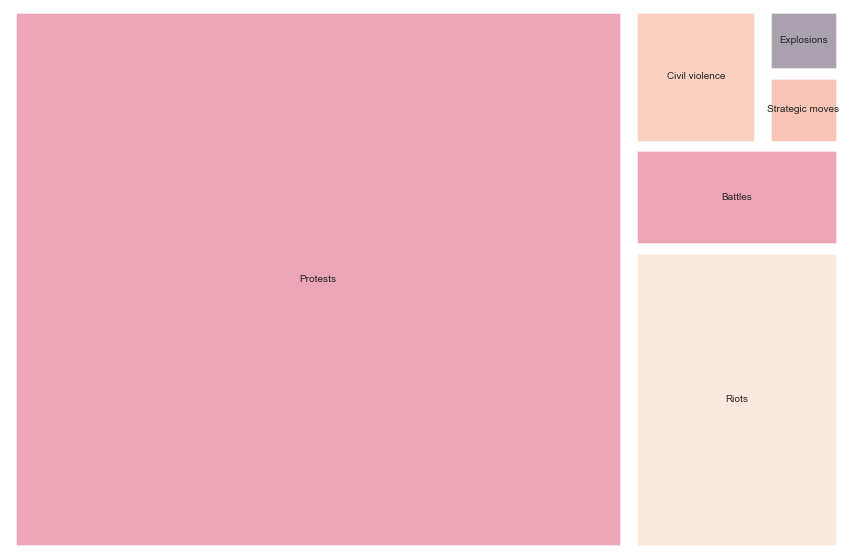

In [193]:
import matplotlib.pyplot as plt
import squarify as sqf

# plot the event_type column in order to observe the categories of events and its frequency on a treemap plot
print(df['event_type'].value_counts())
df["event_type"].replace({"Violence against civilians": "Civil violence", "Strategic developments": "Strategic moves", "Explosions/Remote violence": "Explosions"}, inplace=True)

eventTypeOccurances = df['event_type'].value_counts().tolist()
eventTypeNames = df['event_type'].value_counts().index.tolist()
sqf.plot(sizes = eventTypeOccurances, label = eventTypeNames, alpha = 0.4, pad = True )
plt.axis('off')
plt.show()

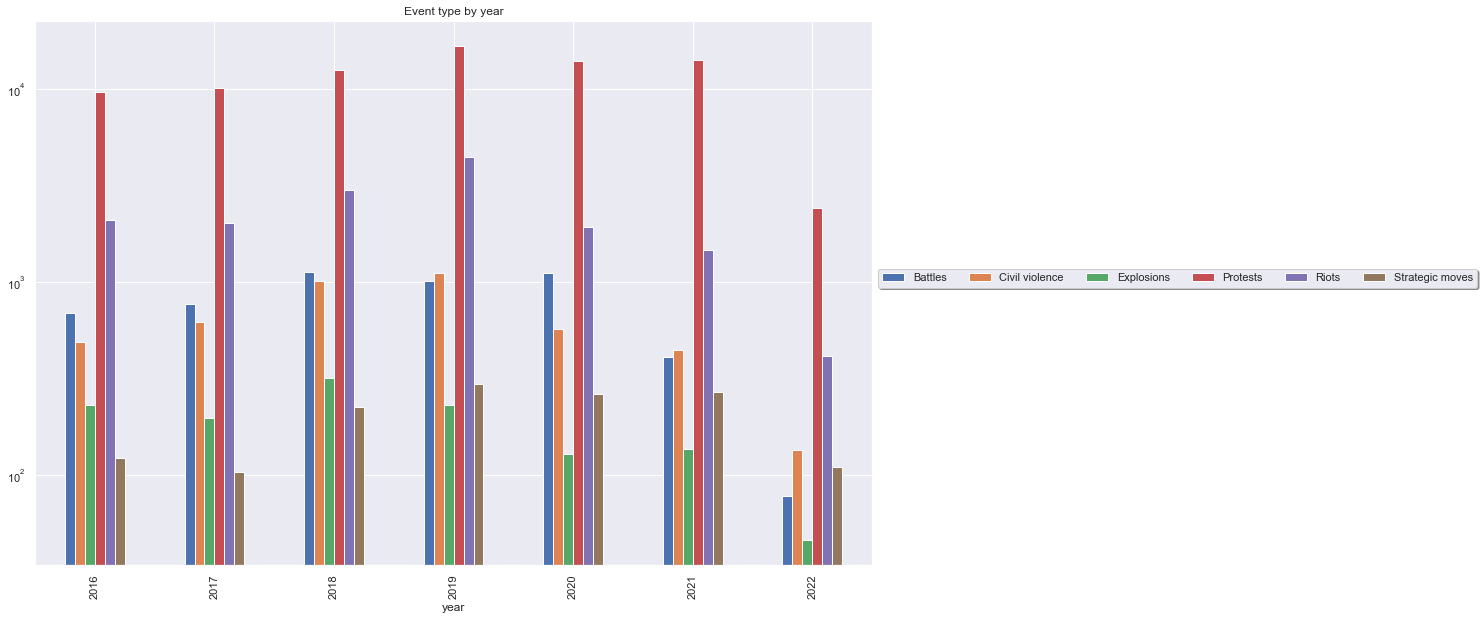

In [194]:
# plot the event types relevant for every year on a unstack bar plot
axes = (df
 .groupby(['year', 'event_type'])
 .size()
 .unstack()
 .plot.bar()
 
)
axes.set_title("Event type by year")
axes.set_yscale('log')
axes.legend(loc='lower left',bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, ncol=6)

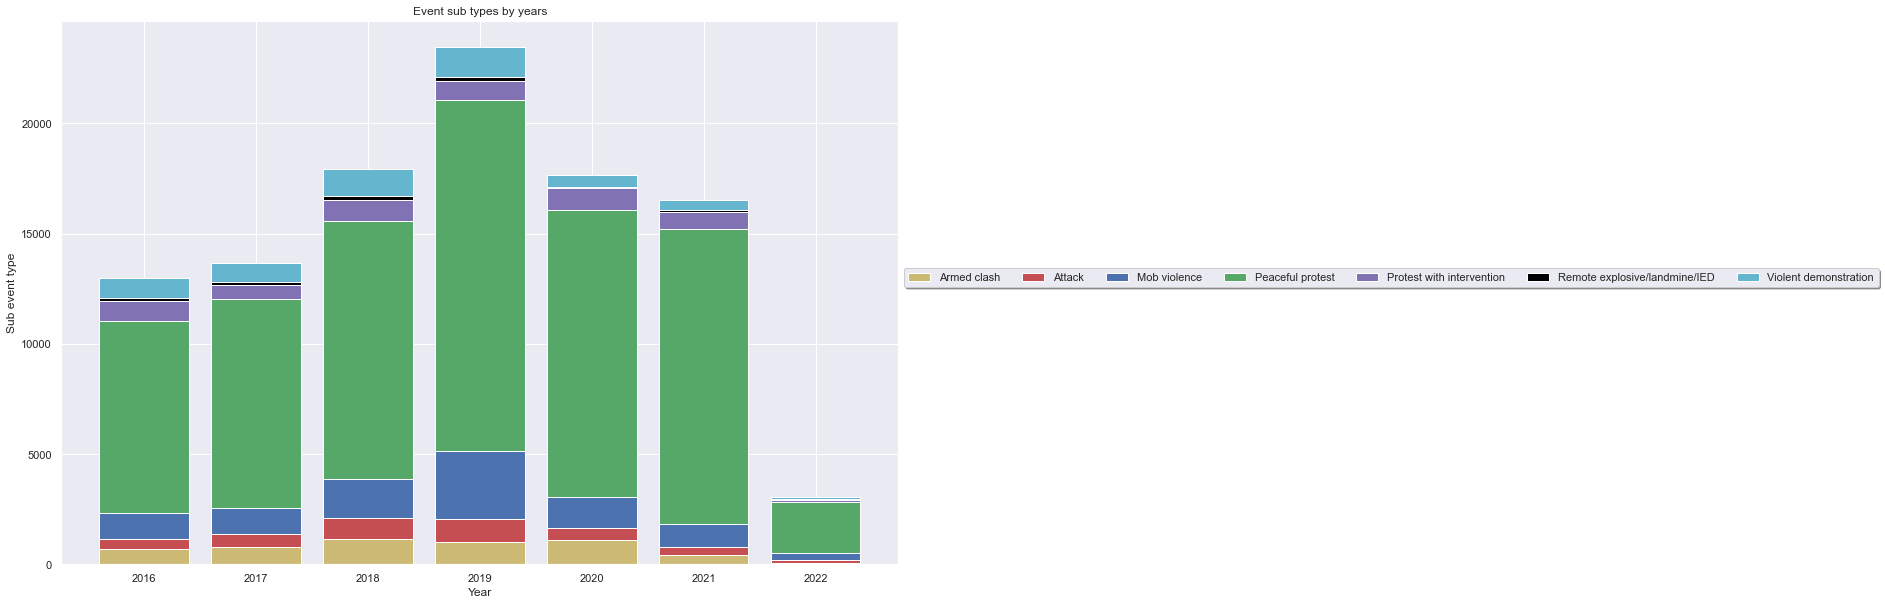

In [195]:
# plot the most relevant 7 sub_event_type for every year on a bar plot
relevantSubEventType = df['sub_event_type'].value_counts().nlargest(7).index.tolist()
rlvSubEvDf = df[df['sub_event_type'].isin(relevantSubEventType)]
relevantSubEventType.sort()

subEvTypeDf = rlvSubEvDf.groupby('sub_event_type')
years = subEvTypeDf.get_group('Armed clash')['year'].value_counts().sort_index(ascending=True).index.tolist()
years = [str(year) for year in years]

subEv1 = subEvTypeDf.get_group('Armed clash')['year'].value_counts().sort_index(ascending=True).tolist()
subEv2 = subEvTypeDf.get_group('Attack')['year'].value_counts().sort_index(ascending=True).tolist()
subEv3 = subEvTypeDf.get_group('Mob violence')['year'].value_counts().sort_index(ascending=True).tolist()
subEv4 = subEvTypeDf.get_group('Peaceful protest')['year'].value_counts().sort_index(ascending=True).tolist()
subEv5 = subEvTypeDf.get_group('Protest with intervention')['year'].value_counts().sort_index(ascending=True).tolist()
subEv6 = subEvTypeDf.get_group('Remote explosive/landmine/IED')['year'].value_counts().sort_index(ascending=True).tolist()
subEv7 = subEvTypeDf.get_group('Violent demonstration')['year'].value_counts().sort_index(ascending=True).tolist()

plt.bar(years, subEv1, color = 'y')
plt.bar(years, subEv2, bottom = subEv1, color='r')
plt.bar(years, subEv3, bottom = np.array(subEv1) + np.array(subEv2), color='b')
plt.bar(years, subEv4, bottom = np.array(subEv1) + np.array(subEv2) + np.array(subEv3), color='g')
plt.bar(years, subEv5, bottom = np.array(subEv1) + np.array(subEv2) + np.array(subEv3) + np.array(subEv4), color='m')
plt.bar(years, subEv6, bottom = np.array(subEv1) + np.array(subEv2) + np.array(subEv3) + np.array(subEv4) + np.array(subEv5), color='black')
plt.bar(years, subEv7, bottom = np.array(subEv1) + np.array(subEv2) + np.array(subEv3) + np.array(subEv4) + np.array(subEv5) + np.array(subEv6), color='c')
plt.xlabel("Year")
plt.ylabel("Sub event type")
plt.legend(["Armed clash", "Attack", "Mob violence", "Peaceful protest", "Protest with intervention", "Remote explosive/landmine/IED", "Violent demonstration"], loc='lower left',bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, ncol=7)
plt.title("Event sub types by years")
plt.show()

<Figure size 1080x720 with 0 Axes>

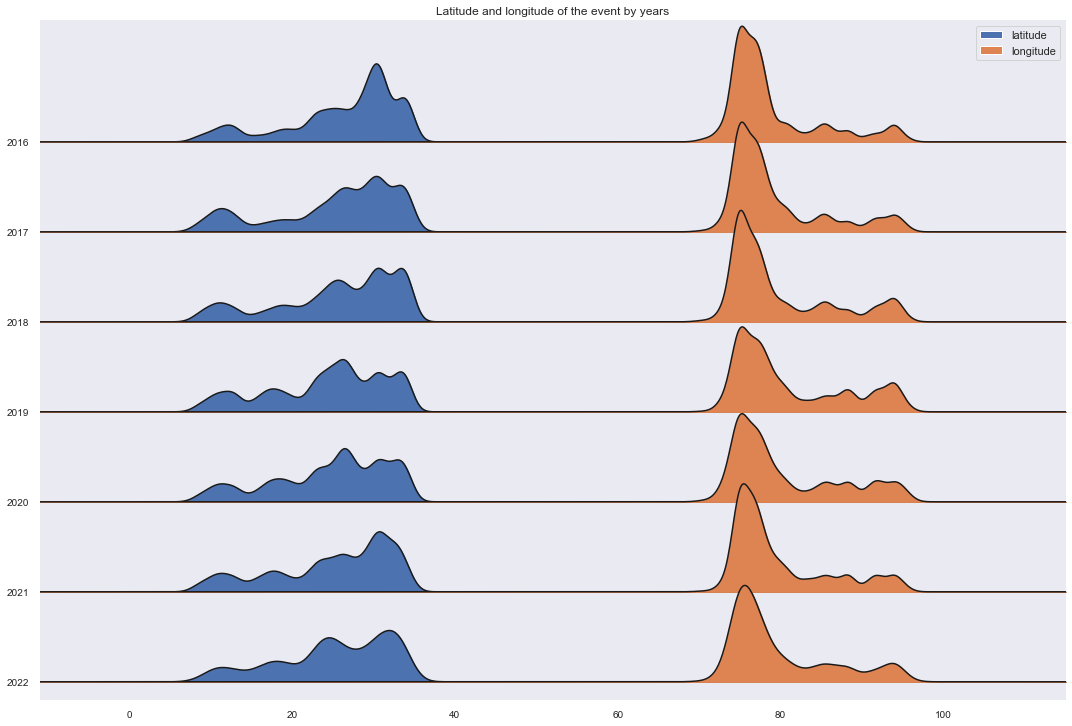

In [196]:
from joypy import joyplot as jplt
from pandas.api.types import CategoricalDtype

# plot the latitude and longitude on the time series on a ridgeline plot
categ_year = CategoricalDtype([2016, 2017, 2018, 2019, 2020, 2021, 2022])
df['categ_year'] = df['year'].astype(categ_year)

plt.figure()

jplt(
    data = df[['latitude', 'longitude', 'categ_year']], 
    by='categ_year',
    legend=True,
)
plt.title('Latitude and longitude of the event by years')
plt.show()

<Figure size 1080x720 with 0 Axes>

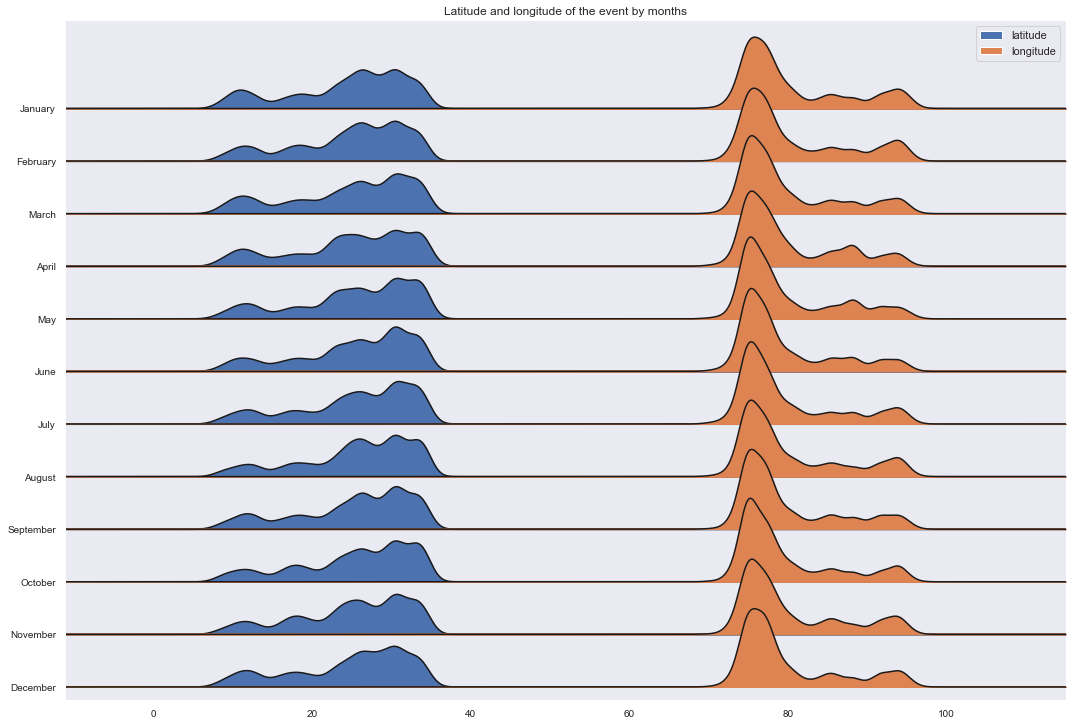

In [197]:
#todo: timeseries - lat and long per month
#!pip install joypy
from joypy import joyplot as jplt
from pandas.api.types import CategoricalDtype
from pandas.api.types import CategoricalDtype

df['event_date'] = df['event_date'].astype("datetime64")
df['event_month'] = df['event_date'].dt.month_name()

categoricalMonth = CategoricalDtype(['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'])
df['event_month_categ'] = df['event_month'].astype(categoricalMonth)

plt.figure()

jplt(
    data = df[['latitude', 'longitude', 'event_month_categ']], 
    by='event_month_categ',
    legend=True,
)
plt.title('Latitude and longitude of the event by months')
plt.show()

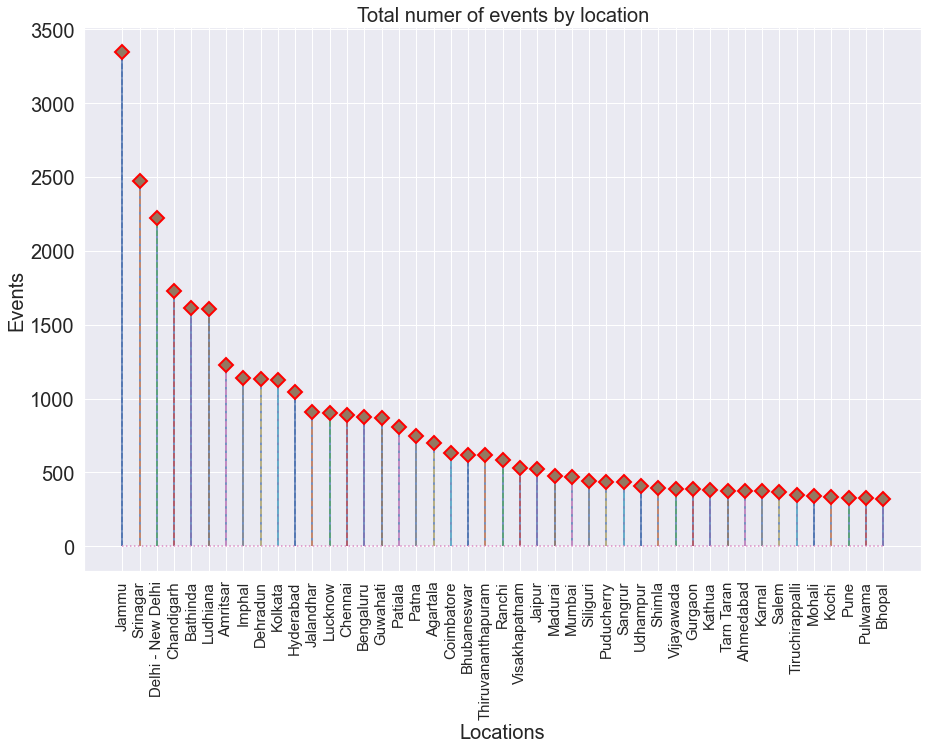

In [198]:
#plot the most common 45 locations of the events on a lollipop plot

locationsName = df['location'].value_counts().nlargest(45).index.tolist()
locationsVal = df['location'].value_counts().nlargest(45).tolist()

fig, axes = plt.subplots()
axes.vlines(locationsName, ymin=0, ymax=locationsVal)
  
(markers, stemlines, baseline) = plt.stem(locationsName, locationsVal, linefmt='--', basefmt = ':', markerfmt ='D',bottom = 1.1, use_line_collection = False)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="red", markeredgewidth=2)

plt.xlabel('Locations',fontsize=20)
plt.ylabel('Events',fontsize=20)
plt.title('Total numer of events by location', fontsize=20)
plt.xticks(locationsName, fontsize=15, rotation=90)
plt.yticks(fontsize=20)
plt.rcParams['figure.figsize'] = [15, 10]

plt.show()

In [199]:
import plotly.graph_objects as go

sourceCount = df['source'].value_counts().nlargest(15).tolist()
sourceNames = df['source'].value_counts().nlargest(15).index.tolist()
pieChart = go.Figure(data=[go.Pie(labels=sourceNames, values=sourceCount, textinfo='label+percent',
                             insidetextorientation='radial', title = 'Event location distribution'
                            )])
pieChart.show()

The next graph is a violin type and it represents the activity of the top 5 groups of "trouble" over the years. We can observe far more constant activity from protesters and rioters than the others. One important aspect is the uniform raise of the Military Forces of India reaching the highest value in 2020 and reducing considerably.

['Protesters (India)', 'Rioters (India)', 'Unidentified Armed Group (India)', 'Military Forces of India (2014-)', 'CPI (Maoist): Communist Party of India (Maoist)']
                                                    
                                  Rioters (India)  0
                               Protesters (India)  1
  CPI (Maoist): Communist Party of India (Maoist)  2
                 Unidentified Armed Group (India)  3
                 Military Forces of India (2014-)  4


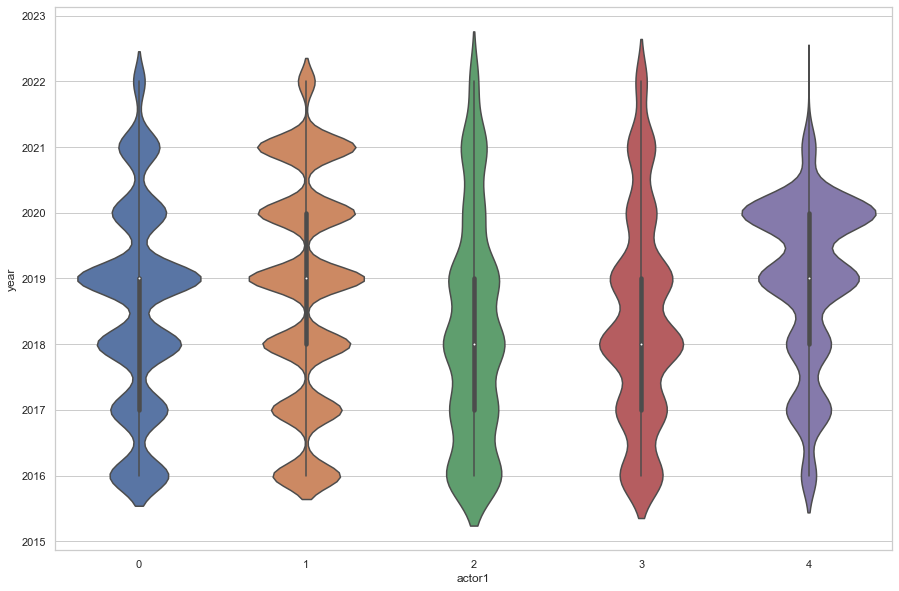

In [200]:
import seaborn as sns

def print_df(df):
   # This code delete index and columns names
   df_ = df.copy()
   df_.columns = ['' for _ in range(len(df.columns))]
   df_.index = ['' for _ in range(len(df))]
   print(df_)

actorsName = df['actor1'].value_counts().nlargest(5).index.tolist()
print(actorsName)

actors1 = df.loc[df["actor1"].isin(actorsName),"actor1"]
actors2 = df.loc[df["actor1"].isin(actorsName),"year"]
actors3 = pd.concat([actors1, actors2],axis=1, join="inner")

actors4 = pd.DataFrame(actors3["actor1"].unique())
numbering = pd.DataFrame(range(len(actors4)))
actors4 = pd.concat([actors4, numbering],axis=1, join="inner")
print_df (actors4)
actors5 = actors3.copy()
actors5['actor1'] = pd.factorize(actors5.actor1)[0]
actors5['actor1'] = actors5['actor1'].astype("category")
sns.set(style = 'whitegrid')
ax = sns.violinplot(x="actor1", y="year", data=actors5, scale="area")

In this plot of type heatmap we can observe the effects/activities that each group has inflicted upon each of the areas. On the left label (Oy) we have the top 10 most afflicted regions from all the protests, conflicts etc. overall in the country. On the bottom label (Ox) we have the top 10 most active main actors in the protests, conflicts etc. regardless of the regions. The heatmap represents the effects of each grouping in the respective areas. We can observe that the protesters have been overall active, which was to be expected since they represent the people. But others, for example Millitary Forces of Pakistan have had a big impact on Jammu and Kashmir and no effect over other areas.

['Protesters (India)', 'Rioters (India)', 'Unidentified Armed Group (India)', 'Military Forces of India (2014-)', 'CPI (Maoist): Communist Party of India (Maoist)', 'Police Forces of India (2014-)', 'Military Forces of India (2014-) Rashtriya Rifles', 'Military Forces of Pakistan (2013-2018)', 'Police Forces of India (2014-) Border Security Force', 'TMC: Trinamool Congress Party']
['Jammu and Kashmir', 'Punjab', 'Tamil Nadu', 'Assam', 'Uttar Pradesh', 'West Bengal', 'Haryana', 'Karnataka', 'Andhra Pradesh', 'Manipur']
                     actor1         admin1
data_id                                   
8912977     Rioters (India)  Uttar Pradesh
8913012  Protesters (India)         Punjab
8913276  Protesters (India)      Karnataka
8913280  Protesters (India)     Tamil Nadu
8913297     Rioters (India)    West Bengal


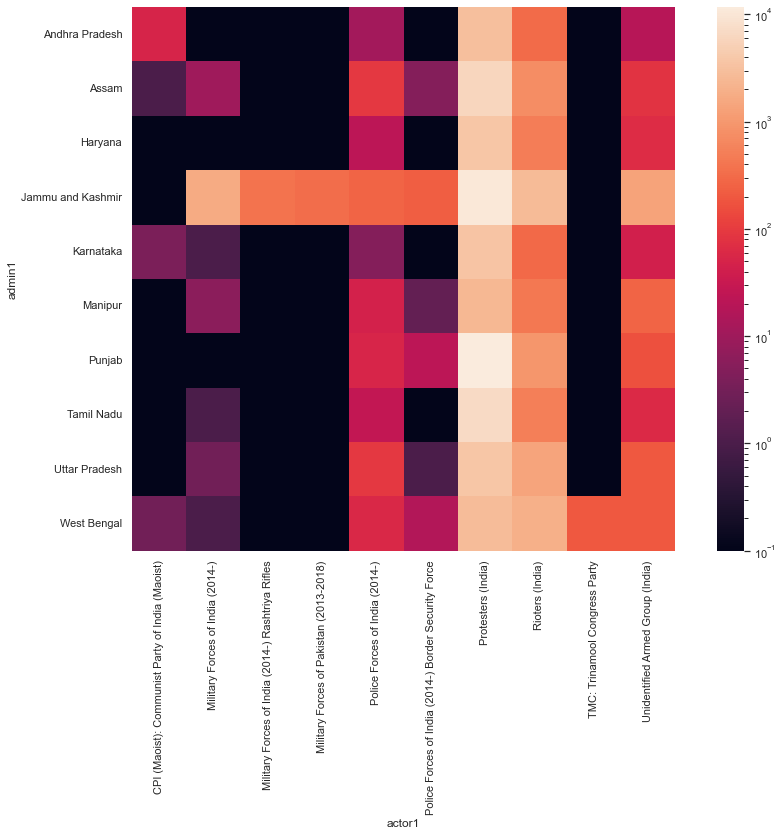

In [201]:
actorsName1 = df['actor1'].value_counts().nlargest(10).index.tolist()
adminsName1 = df['admin1'].value_counts().nlargest(10).index.tolist()
print(actorsName1)
print(adminsName1)

strikes1 = df.loc[(df["actor1"].isin(actorsName1) & df["admin1"].isin(adminsName1)),"actor1"]
strikes2 = df.loc[(df["actor1"].isin(actorsName1) & df["admin1"].isin(adminsName1)),"admin1"]
strikes3 = pd.concat([strikes1, strikes2],axis=1, join="inner")
print(strikes3.head())

strikes4 = strikes3.groupby(["actor1", "admin1"]).size().unstack(level=0)
strikes4 = strikes4.fillna(0.1)

from matplotlib.colors import LogNorm
p1 = sns.heatmap(strikes4, square=True, norm=LogNorm())

Next are two interactive maps that represents the activity over the span of the years (2016-present) of the top 10 groups on the map and the events by type. The user can switch between the groups and results in different scatter plots showing the places of activities the group has executed. The coordinates are slightly off but the general area is still proper, the most affected area is the island on the bottom right. Even so we can clearly tell the differences between groups activities. For example the protesters are around the entire country which represents that the people were united in the matters that were discussed. We can observe however the CPI (Maoist) group having a greater effect on the area central-east and slight effects in the south and west with no interaction of the north, west etc. Meanwhile the Military Forces of Packistan have had only one area of interest, that being Jammu-Kashmir, with no regards of the other areas of the country, and even there the activity was focused on the east of the region.

In [202]:
#%matplotlib widget
%matplotlib ipympl
import ipywidgets as widgets
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
actorsNameInt = df['actor1'].value_counts().nlargest(10).index.tolist()
print(actorsNameInt)
india_img = mpimg.imread('India.png')
def say_my_name(name):
    df_in = df.loc[df["actor1"] == name]
    plt.clf()
    plt.imshow(india_img, extent=[67.8, 98.5, 6.4, 36.6], alpha=0.5)
    plt.scatter('longitude', 'latitude', data=df_in)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
widgets.interact(say_my_name, name=actorsNameInt);

['Protesters (India)', 'Rioters (India)', 'Unidentified Armed Group (India)', 'Military Forces of India (2014-)', 'CPI (Maoist): Communist Party of India (Maoist)', 'Police Forces of India (2014-)', 'Military Forces of India (2014-) Rashtriya Rifles', 'Military Forces of Pakistan (2013-2018)', 'Police Forces of India (2014-) Border Security Force', 'TMC: Trinamool Congress Party']


interactive(children=(Dropdown(description='name', options=('Protesters (India)', 'Rioters (India)', 'Unidenti…

This map represents the type of protests/riots over the span of a selected time by the user. This helps us review the spread of dangers throughout the country. As we could have already predicted the protests are as spread as they could be throughout the years. What is truly important are the other types of incidents, for example Violence against civilians. Throughout the year they have been inflicted in many regions with great numbers, but in the recent period of time (Oct 2021 - present) Gujarat has barely seen any activities of sorts. The possibility of it happening in the close future is still there but the chances and probabilities are lower than other regions of the country. Thus if we would decide to visit India we should obviously choose one with less chances of us getting into a "civil war". That is an exaggeration, but not that far off, there have been plenty of cases of remote violence/explosions throughout the north, east and south of India, so not such a good place to visit by odds of heavy incidents. Thus this representation can help tourists decide where to visit, it's a big country afterall with plenty to see, no need to risk your life in the current state of some areas while you can still experience the beauty of the country in other ares.

In [ ]:
df_tmp = df.copy()
df_tmp["Proper_Date"] = pd.DatetimeIndex(df_tmp["event_date"]).date

In [249]:
%matplotlib ipympl
import datetime
from ipywidgets import Layout
dates = [datetime.date(2016, i, 1) for i in range(1, 13)]
for j in range(2017,2023):
    dates = dates+[datetime.date(j, i, 1) for i in range(1, 13)]
options = [(i.strftime('%b %Y'), i) for i in dates]
actorsNameInt = df['event_type'].value_counts().nlargest(10).index.tolist()
india_img = mpimg.imread('India.png')
b = widgets.SelectionRangeSlider(
    options=options,
    index=(0, len(options)-1),
    description='Period',
    disabled=False,
    layout=Layout(width='500px')
)
a = widgets.Dropdown(
    options=actorsNameInt,
    value=actorsNameInt[0],
    description='Actor:',
    disabled=False,
)
ui = widgets.HBox([a, b])
def f(a, b):
    df_in = df_tmp.loc[df_tmp["event_type"] == a]
    df_in = df_in.drop(df_in[df_in.Proper_Date <b[0]].index)
    df_in = df_in.drop(df_in[df_in.Proper_Date >b[1]].index)
    plt.clf()
    plt.imshow(india_img, extent=[67.8, 98.5, 6.4, 36.6], alpha=0.5)
    if df.empty == False:
        plt.scatter('longitude', 'latitude', data=df_in)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

out = widgets.interactive_output(f, {'a': a, 'b': b})

display(ui, out)

Output()

# Data Modelling

Given that we have time series data (events are recorded on the day they happen), the best approach is to do time series forecasting for some information that we can gather from the data. We choose that information to be number of fatalities in the most violent region (by total number of fatalities). First we need to group events by month in order to create the data points. Besides the number of fatalities, we wanted to visualize the number of riots, battles and civil violences to see if there is any correlation between then.

In [204]:
%matplotlib inline
df['event_dummy'] = df['event_type']
df = pd.get_dummies(df, prefix=['event'], columns=['event_dummy'])

In [265]:
df['year_month'] = pd.DatetimeIndex(df_tmp["event_date"]).strftime('%Y_%m')

In [266]:
df['year_month'].unique()

array(['2022_03', '2022_02', '2022_01', '2021_12', '2021_11', '2021_10',
       '2021_09', '2021_08', '2021_07', '2021_06', '2021_05', '2021_04',
       '2021_03', '2021_02', '2021_01', '2020_12', '2020_11', '2020_10',
       '2020_09', '2020_08', '2020_07', '2020_06', '2020_05', '2020_04',
       '2020_03', '2020_02', '2020_01', '2019_12', '2019_11', '2019_10',
       '2019_09', '2019_08', '2019_07', '2019_06', '2019_05', '2019_04',
       '2019_03', '2019_02', '2019_01', '2018_12', '2018_11', '2018_10',
       '2018_09', '2018_08', '2018_07', '2018_06', '2018_05', '2018_04',
       '2018_03', '2018_02', '2018_01', '2017_12', '2017_11', '2017_10',
       '2017_09', '2017_08', '2017_07', '2017_06', '2017_05', '2017_04',
       '2017_03', '2017_02', '2017_01', '2016_12', '2016_11', '2016_10',
       '2016_09', '2016_08', '2016_07', '2016_06', '2016_05', '2016_04',
       '2016_03', '2016_02', '2016_01'], dtype=object)

In [267]:
fatalities_by_month = df.groupby('year_month')['fatalities'].sum()
riots_by_month = df.groupby('year_month')['event_Riots'].sum()
battles_by_month = df.groupby('year_month')['event_Battles'].sum()
violences_by_month = df.groupby('year_month')['event_Civil violence'].sum()

### Find best decomposition frequency

A good way of choosing the right frequency is by trying different periods in order to minimize the residual. We can measure the residual by using the Dickey-Fuller test. More exactly by finding the test with the minimum p from all the frequencies. The reasoning is that we want the residuals distribution to be stationary. After running the tests for periods of 3, 6, 9 and 12, the smallest p was for a period of 3, and all other decompositions were used with this period. This process should be done for all distribution we are going to decompose, but the other distributions are only for illustration purposes and we needed to have the same scale for trend.

In [268]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_fatalities_3 = seasonal_decompose(fatalities_by_month, model='aditive', period=3, extrapolate_trend='freq')
decomp_fatalities_6 = seasonal_decompose(fatalities_by_month, model='aditive', period=6, extrapolate_trend='freq')
decomp_fatalities_9 = seasonal_decompose(fatalities_by_month, model='aditive', period=9, extrapolate_trend='freq')
decomp_fatalities_12 = seasonal_decompose(fatalities_by_month, model='aditive', period=12, extrapolate_trend='freq')
#we have 0 values so no multiplicative decomposition

from statsmodels.tsa.stattools import adfuller
#calculate dickey fuller test to see if multiplicative or aditive and find good period
print("Dickey-Fuller p-value (aditive, period 3)")
p_add_3 = adfuller(decomp_fatalities_3.resid)[1]
print(p_add_3)

print("Dickey-Fuller p-value (aditive, period 6)")
p_add_6 = adfuller(decomp_fatalities_6.resid)[1]
print(p_add_6)

print("Dickey-Fuller p-value (aditive, period 9)")
p_add_9 = adfuller(decomp_fatalities_9.resid)[1]
print(p_add_9)

print("Dickey-Fuller p-value (aditive, period 12)")
p_add_12 = adfuller(decomp_fatalities_12.resid)[1]
print(p_add_12)

Dickey-Fuller p-value (aditive, period 3)
3.1090849526932066e-05
Dickey-Fuller p-value (aditive, period 6)
5.243141349571328e-07
Dickey-Fuller p-value (aditive, period 9)
3.6177996342596994e-08
Dickey-Fuller p-value (aditive, period 12)
8.856404968818851e-09


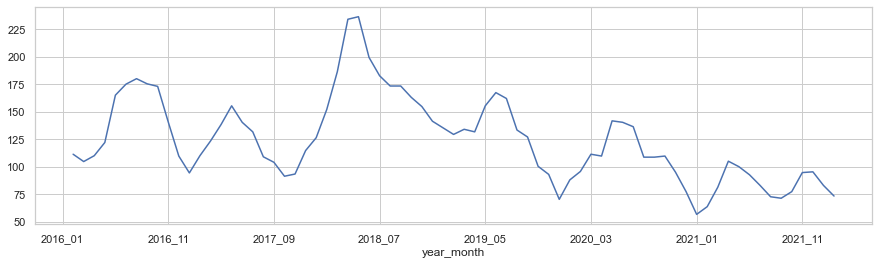

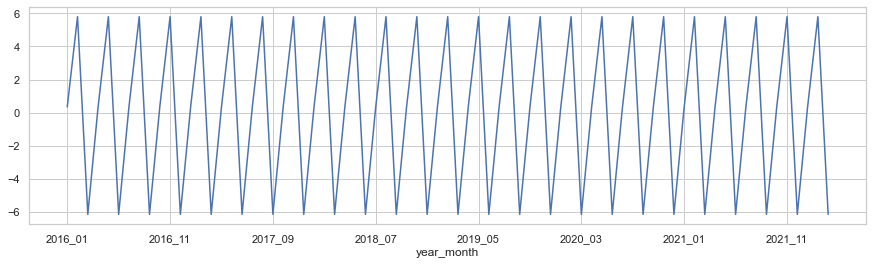

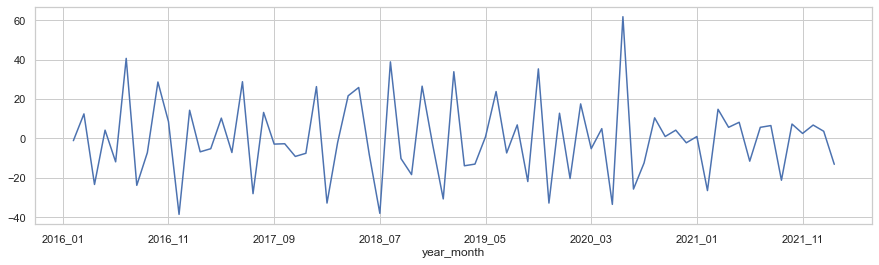

In [269]:
%matplotlib inline

decomp_fatalities = seasonal_decompose(fatalities_by_month, model='aditive', period=3)
decomp_riots = seasonal_decompose(riots_by_month, model='aditive', period=3)
decomp_battles = seasonal_decompose(battles_by_month, model='aditive', period=3)
decomp_violences = seasonal_decompose(violences_by_month, model='aditive', period=3)
plt.rcParams['figure.figsize'] = [15, 4]
decomp_fatalities.trend.plot()
plt.show()
decomp_fatalities.seasonal.plot()
plt.show()
decomp_fatalities.resid.plot()
plt.show()

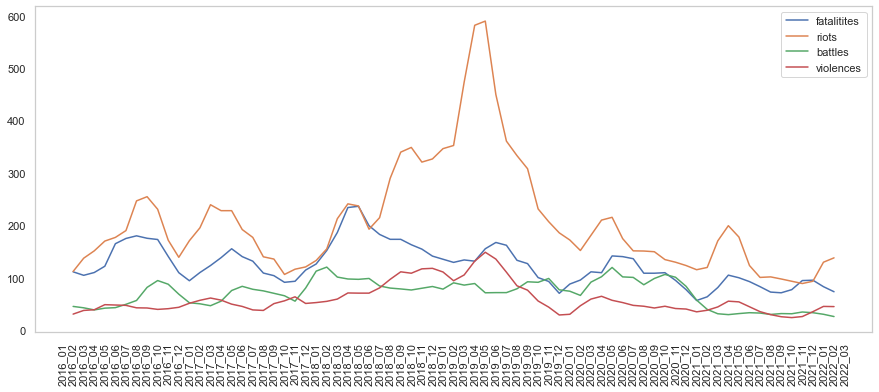

In [270]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(decomp_fatalities.trend, label = "fatalitites")
plt.plot(decomp_riots.trend, label = "riots")
plt.plot(decomp_battles.trend, label = "battles")
plt.plot(decomp_violences.trend, label = "violences")
plt.legend()
plt.grid(visible=None)
plt.xticks(rotation=90)
plt.show()

### Forecasting on number of fatalities

The purpose of this research should be to decrease the number of fatalities. Since most of manifestations are legal and the reasons are out of scope for this dataset, the only way in which we could make an impact is by forecasting the number of fatalities in the coming months by region. The results should help to bring more police officers and more mobile medical units in the places that will have a high tendency for fatalities. Also this research should help future turists visiting india to avoid areas with a high risk of injury. For illustration purposes, we have chosen the region with the most fatalities, Jammu and Kashmir, and employed varios methods to forecast a 6 months period.

['Jammu and Kashmir', 'Chhattisgarh', 'Jharkhand']
            fatalities
year_month            
2016_01             13
2016_02             40
2016_03             12
2016_04             17
2016_05             51
            fatalities
year_month            
2016_01             21
2016_02             11
2016_03             50
2016_04             14
2016_05             10
            fatalities
year_month            
2016_01             20
2016_02             10
2016_03             14
2016_04             11
2016_05              7


<AxesSubplot:xlabel='year_month'>

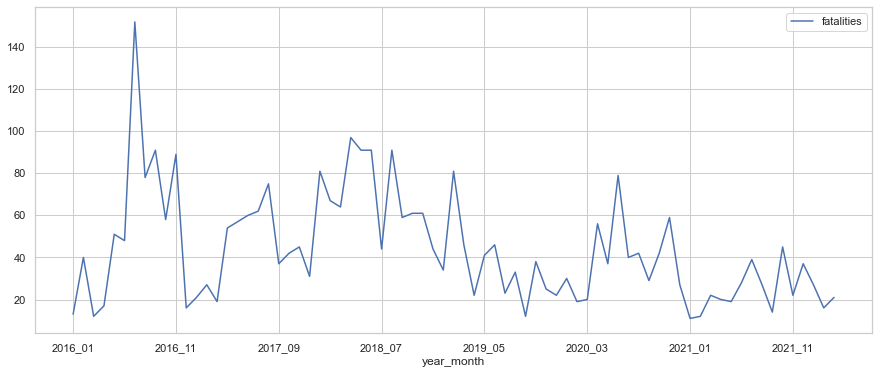

In [289]:

most_violent_regions = df.groupby('admin1')['fatalities']\
                .sum().sort_values(ascending=False)[:3]\
                .index.to_list()
print(most_violent_regions)

fatalities_by_month_and_admin = \
    df.groupby(['year_month', 'admin1'])['fatalities'].sum().to_frame()
idx = pd.IndexSlice
fatalities_r1 = fatalities_by_month_and_admin.loc[idx[:, most_violent_regions[0]], :]
fatalities_r1.index = fatalities_r1.index.droplevel(1)
print(fatalities_r1.head())
fatalities_r2 = fatalities_by_month_and_admin.loc[idx[:, most_violent_regions[1]], :]
fatalities_r2.index = fatalities_r2.index.droplevel(1)
print(fatalities_r2.head())
fatalities_r3 = fatalities_by_month_and_admin.loc[idx[:, most_violent_regions[2]], :]
fatalities_r3.index = fatalities_r3.index.droplevel(1)
print(fatalities_r3.head())

fatalities_r1.plot()

In [343]:
#we will try to predict fatalities in Jammu and Kashmir over 6 months

train_size = len(fatalities_r1) - 6

seas_periods = round(train_size/3)

fatalities_train = fatalities_r1[:train_size]
fatalities_test = fatalities_r1[train_size:]
fatalities_pred = fatalities_test.copy()

from statsmodels.tsa.holtwinters import ExponentialSmoothing

def plot_results():
    global fatalities_train, fatalities_test, fatalities_pred
    plt.grid(visible=None)
    plt.rcParams['figure.figsize'] = [15, 6]
    plt.plot(fatalities_train, label='Train')
    plt.plot(fatalities_test, label='Test')
    plt.plot(fatalities_pred, label='Pred')
    plt.legend(loc='best')
    plt.title('Data split')
    plt.xticks(rotation=90)
    plt.show()
    
from sklearn.metrics import mean_squared_error

def get_rmse_mape(method):
    global fatalities_test, fatalities_pred
    rmse = np.sqrt(mean_squared_error(fatalities_test['fatalities'], fatalities_pred['fatalities'])).round(2)
    mape = np.round(np.mean(np.abs(fatalities_test['fatalities']-fatalities_pred['fatalities'])/fatalities_test['fatalities'])*100,2)

    results = pd.DataFrame({'Method':[method], 'MAPE': [mape], 'RMSE': [rmse]})
    return results

### Scoring

For scoring we have decided to use Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE). The lower these scores are, the better the model performs. Accuracy can also be calculated by substracting MAPE from 100.

### Forecasting methods

As for the forecasting, we have employed 6 methods with various degrees of success. The first method tried is the simple moving average method. This method calculates averages over a certain period (chose as a third of the train set size) and predict the last value as a constant. Next we have used two exponential smoothing techniques: Holt Winter's exponential smoothing and Holt Winter's exponential method with trend and seasonality. Last three are Auto Regressive methods and from those we have choosen Auto Regression method, Moving Average method and Seasonal auto regressive integrated moving average.

year_month
2021_10    32.130435
2021_11    32.130435
2021_12    32.130435
2022_01    32.130435
2022_02    32.130435
2022_03    32.130435
Name: fatalities, dtype: float64
rmse
10.82
mape
43.44
         Method   MAPE   RMSE
0  Naive method  43.44  10.82


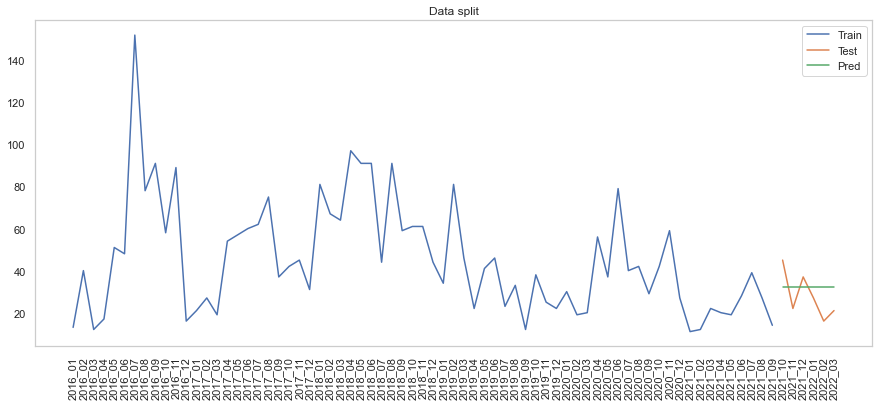

In [341]:
#simple moving average
fatalities_pred['fatalities'] = fatalities_r1.rolling(seas_periods).mean()
fatalities_pred['fatalities'] = fatalities_pred['fatalities'][0]
print(fatalities_pred['fatalities'])


results = get_rmse_mape('Simple moving average')
print(results)
plot_results()

{'smoothing_level': 0.45970592168068053, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 24.597573601789957, 'initial_trend': -0.0370260819992669, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


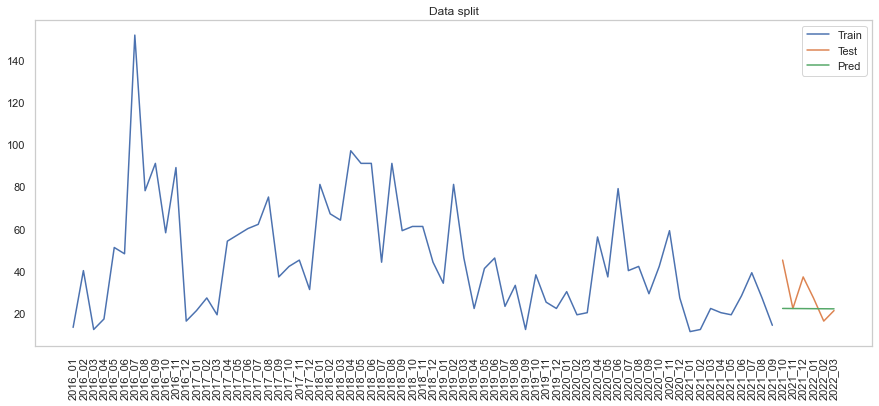

In [332]:
#Holt Winters' additive method
model = ExponentialSmoothing(np.asarray(fatalities_train) ,seasonal_periods=seas_periods ,trend='add', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
fatalities_pred['fatalities'] = model_fit.forecast(len(fatalities_test))
results = pd.concat([results, get_rmse_mape('Holt Winters exponential')])
plot_results()

{'smoothing_level': 0.18577497575605365, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 43.57957712402419, 'initial_trend': -0.1620440234672667, 'initial_seasons': array([-24.57867738,   0.1992875 , -10.9984805 , -13.84916495,
         8.97901865,  18.15924645,  46.65304275,  20.50447462,
        27.67087946,   6.8428982 ,  13.66914755,  -6.16085634,
        -4.34061396, -16.17990231,  -8.35545772,  -7.86523285,
       -11.37546814,  -4.54930139,  -2.39218523,  -2.57219162,
        -8.08951589, -17.27915691, -11.80384037]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


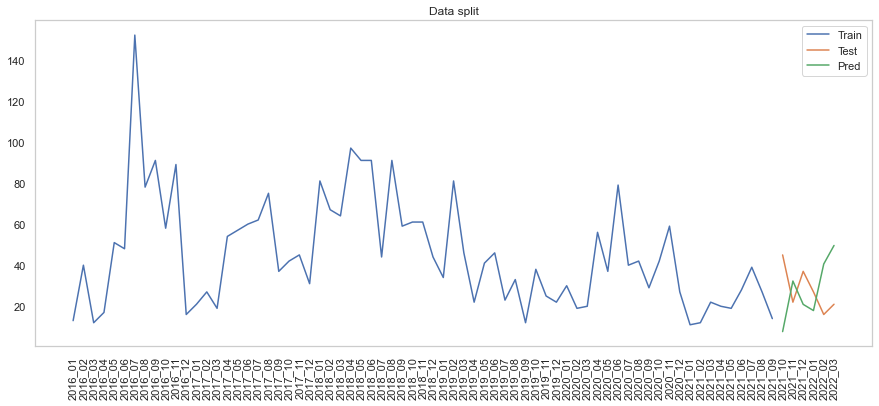

In [333]:
#Holt Winters' additive method with trend and seasonality
model = ExponentialSmoothing(np.asarray(fatalities_train) ,seasonal_periods=seas_periods ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
fatalities_pred['fatalities'] = model_fit.forecast(len(fatalities_test))
results = pd.concat([results, get_rmse_mape('Holt Winters with trend and seasonality')])
plot_results()

In [334]:
#check if time series is stationary
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(fatalities_train)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])
#p value smaller than 0.05, that means series is stationary

ADF Statistic: -2.952431
Critical Values @ 0.05: -2.91
p-value: 0.039582


In [335]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(fatalities_train)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

#p value is bigger than 0.05, that means series is stationary

KPSS Statistic: 0.450309
Critical Values @ 0.05: 0.46
p-value: 0.055470


### Transformation and differencing

In auto regressive methods, the series which will be used for forecasting needs to be stationary (meaning having the variance and co-variance constant). We can find out if a series is stationary or not by checking p parameter from Augmented Dickey-Fuller (ADF) test and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. For the first test, the p parameter needs to be smaller than 0.05 and for the second test, the p parameter needs to be greater than 0.05. If one of these tests fails, we can use box cox transformation to make the variance constant and differencing transform to remove the trend. After that, the predicted values needs to be reconstructed in the original space.

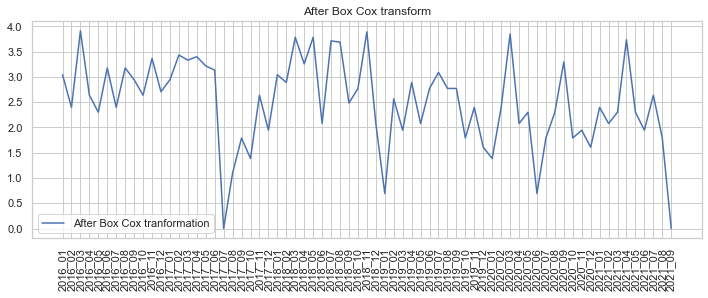

In [318]:
#NO need to perform transformation and differencing since the series is stationary 

#boxcox transform
from scipy.stats import boxcox
fatalities_boxcox = pd.Series(boxcox(fatalities_train['fatalities'], lmbda=0), index = fatalities_train.index)

plt.figure(figsize=(12,4))
plt.plot(fatalities_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.xticks(rotation=90)
plt.show()

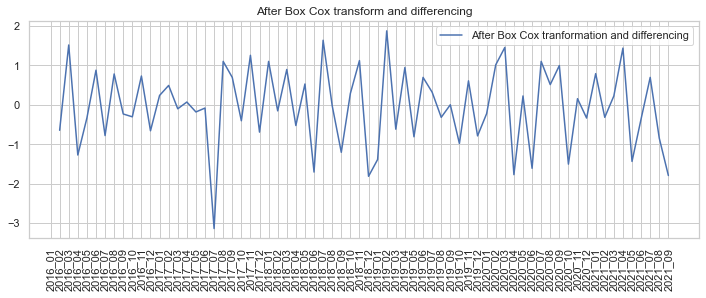

In [319]:
#differencing to remove trend
fatalities_boxcox_diff = pd.Series(fatalities_boxcox - fatalities_boxcox.shift(), fatalities_train.index)
plt.figure(figsize=(12,4))
plt.plot(fatalities_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.xticks(rotation=90)
plt.show()

In [320]:
#after transform first value will be na
fatalities_boxcox_diff.dropna(inplace=True)

In [321]:
adf_test = adfuller(fatalities_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])
#series is stationary

ADF Statistic: -8.273466
Critical Values @ 0.05: -2.91
p-value: 0.000000


In [322]:
kpss_test = kpss(fatalities_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])
#series is stationary

KPSS Statistic: 0.213827
Critical Values @ 0.05: 0.46
p-value: 0.100000


const      44.756975
ar.L1       0.457729
sigma2    574.401990
dtype: float64


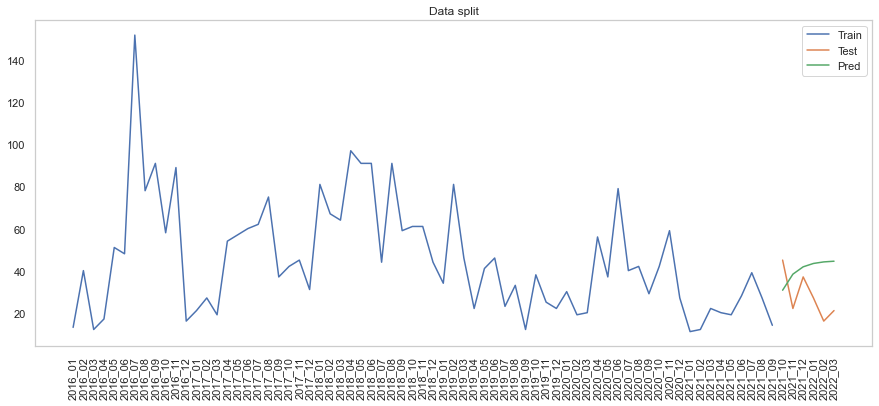

In [336]:
#auto regression method
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(fatalities_train, order=(1, 0, 0))
model_fit = model.fit()
print(model_fit.params)
pred = model_fit.predict(start=train_size, end=train_size+5)
fatalities_pred['fatalities'] = pred.to_numpy()
#used to transform in case series is not stationary
#fatalities_pred['fatalities'] = fatalities_pred['fatalities'].cumsum()
##fatalities_pred['fatalities'] = fatalities_pred['fatalities'].add(fatalities_boxcox[0]+0.5)
#fatalities_pred['fatalities'] = np.exp(fatalities_pred['fatalities'])
results = pd.concat([results, get_rmse_mape('Auto regression')])
plot_results()

const      45.280542
ma.L1       0.280468
sigma2    635.455463
dtype: float64


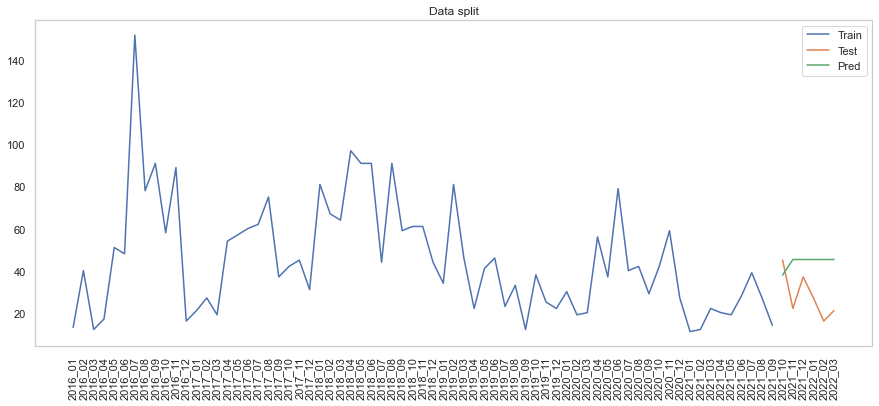

In [337]:
#moving average method 
model = ARIMA(fatalities_train, order=(0, 0, 1))
model_fit = model.fit()
print(model_fit.params)
pred = model_fit.predict(start=train_size, end=train_size+5)
fatalities_pred['fatalities'] = pred.to_numpy()
#fatalities_pred['fatalities'] = fatalities_pred['fatalities'].cumsum()
#fatalities_pred['fatalities'] = fatalities_pred['fatalities'].add(fatalities_boxcox[0]-1.0)
#fatalities_pred['fatalities'] = np.exp(fatalities_pred['fatalities'])
#results = pd.concat([results, get_rmse_mape('Moving average')])
plot_results()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21054D+00    |proj g|=  1.01439D-01

At iterate    5    f=  3.18800D+00    |proj g|=  6.84410D-03

At iterate   10    f=  3.18381D+00    |proj g|=  3.92193D-02


 This problem is unconstrained.



At iterate   15    f=  3.17718D+00    |proj g|=  1.27667D-04

At iterate   20    f=  3.17718D+00    |proj g|=  2.87008D-04

At iterate   25    f=  3.17717D+00    |proj g|=  2.51307D-03

At iterate   30    f=  3.17715D+00    |proj g|=  2.11440D-03

At iterate   35    f=  3.17714D+00    |proj g|=  1.33438D-03

At iterate   40    f=  3.17710D+00    |proj g|=  1.36929D-03

At iterate   45    f=  3.17708D+00    |proj g|=  1.37631D-03

At iterate   50    f=  3.17706D+00    |proj g|=  1.02778D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   1.028D-03   3.177D+00
  F =   3.17705758628

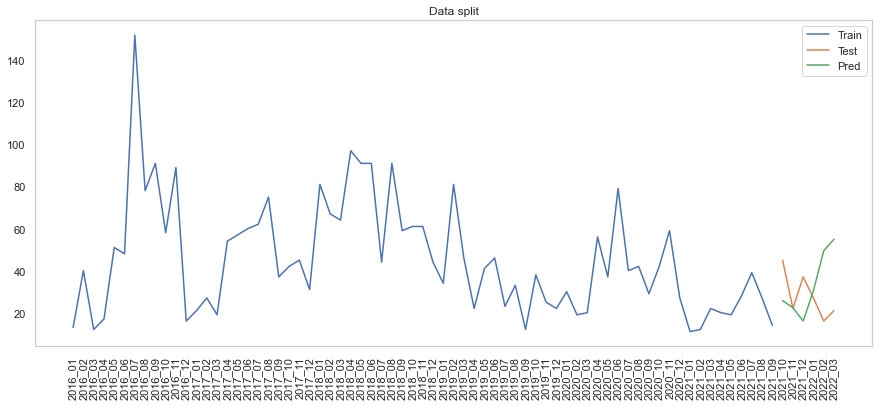

In [338]:
#Seasonal auto regressive integrated moving average 
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(fatalities_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, seas_periods))
model_fit = model.fit()
print(model_fit.params)
pred = model_fit.predict(start=train_size+1, end=train_size+6)
fatalities_pred['fatalities'] = pred.to_numpy()
#fatalities_pred['fatalities'] = fatalities_pred['fatalities'].cumsum()
#fatalities_pred['fatalities'] = fatalities_pred['fatalities'].add(fatalities_boxcox[0]-1.0)
#fatalities_pred['fatalities'] = np.exp(fatalities_pred['fatalities'])
results = pd.concat([results, get_rmse_mape('SARIMA')])
plot_results()

### Results

As we can see from the table below, over this short period of time, the simples methods perform best, with Holt Winters exponential method in the first place followed by simple moving average method.

In [339]:
results.head(6)

,Method,MAPE,RMSE
0,Naive method,43.44,10.82
0,Holt Winters exponential,25.23,11.67
0,Holt Winters with trend and seasonality,82.77,23.32
0,Auto regression,77.90,18.74
0,SARIMA,80.88,22.72
